In [5]:
#import các thư viện cần thiết
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [6]:
#khai báo lớp
Categories=['Car','Moto']
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/SVM/Car-Moto-Dataset.zip

In [ ]:
!mv /content/Car-Moto-Dataset /content/drive/MyDrive/SVM

In [ ]:
#Load và tiền xử lý dữ liệu
flat_data_arr=[]
target_arr=[]
datadir='/content/drive/MyDrive/SVM/Car-Moto-Dataset'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3)) #Resize ảnh về kích thước 150x150 px với cả 3 kênh RGB
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i)) #Gán nhãn từng ảnh qua mảng 1 chiều ở trên.
    print(i)
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr) #Chuyển ảnh rgb ma trận mxn thành mảng 1 chiều.
target=np.array(target_arr)
print("t",target)
df=pd.DataFrame(flat_data) #Gộp tất cả mảng 1 chiều ở trên thành 1 danh sách.
df['Target']=target
df

loading... category : Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Car
Ca

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.719420,0.707655,0.640989,0.730849,0.719085,0.652470,0.748493,0.736729,0.677376,0.762569,...,0.004005,0.007927,0.001059,0.010432,0.014354,0.001159,0.010260,0.014182,0.000014,0
1,0.362562,0.362562,0.362562,0.362562,0.362562,0.362562,0.362562,0.362562,0.362562,0.362562,...,0.501865,0.482257,0.470493,0.505399,0.485791,0.474026,0.505882,0.486275,0.474510,0
2,0.571974,0.607268,0.634719,0.572030,0.607325,0.634776,0.570322,0.605616,0.633067,0.569745,...,0.211734,0.211734,0.213217,0.204767,0.204767,0.198599,0.203922,0.203922,0.196078,0
3,0.807843,0.878431,0.933333,0.807843,0.878431,0.933333,0.807843,0.878431,0.933333,0.807843,...,0.619681,0.512291,0.417059,0.577516,0.494788,0.389066,0.576902,0.494549,0.388667,0
4,0.580832,0.631812,0.663185,0.584319,0.635299,0.666672,0.588036,0.639016,0.670389,0.588849,...,0.145223,0.223485,0.255333,0.023321,0.082407,0.112396,0.035563,0.094829,0.123216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
796,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
797,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
798,0.296884,0.292963,0.173670,0.327911,0.323989,0.206342,0.233407,0.229485,0.112266,0.175153,...,0.979763,0.952731,0.929202,0.978641,0.947269,0.925700,0.980392,0.945099,0.925490,1


In [ ]:
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(800, 67501)


In [ ]:
#Chia tập dữ liệu train 80% và tập test 20%
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Target, Length: 800, dtype: int64


In [ ]:
print(x)

        0         1         2         3         4         5         6      \
0    0.719420  0.707655  0.640989  0.730849  0.719085  0.652470  0.748493   
1    0.362562  0.362562  0.362562  0.362562  0.362562  0.362562  0.362562   
2    0.571974  0.607268  0.634719  0.572030  0.607325  0.634776  0.570322   
3    0.807843  0.878431  0.933333  0.807843  0.878431  0.933333  0.807843   
4    0.580832  0.631812  0.663185  0.584319  0.635299  0.666672  0.588036   
..        ...       ...       ...       ...       ...       ...       ...   
795  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
796  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
797  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
798  0.296884  0.292963  0.173670  0.327911  0.323989  0.206342  0.233407   
799  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

        7         8         9      ...     67490     67491     67492  \
0  

In [ ]:
print(x_train.shape)
print(x_test.shape)

(640, 67500)
(160, 67500)


In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
#kernel:tính toán trước ma trận hạt nhân từ ma trận dữ liệu
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid) #Tìm ra tham số có tỷ lệ chính xác cao
model.fit(x_train,y_train) #Train mode với model.fit
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
#Đánh giá model qua tập test
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1])

In [ ]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1])

In [ ]:
#Tỉ lệ chính xác của model
print(f"The model is {accuracy_score(y_pred,y_test)}% accurate")

The model is 0.75625% accurate


In [ ]:
#Lưu model
pickle.dump(model,open('/content/drive/MyDrive/SVM/Car-Moto-Dataset/car_model.p','wb'))
print("Pickle is dumped successfully")

Enter URL of Image: https://xehay.vn/uploads/images/2015/07/xehay-HondaCBR500R-310715-11.jpg


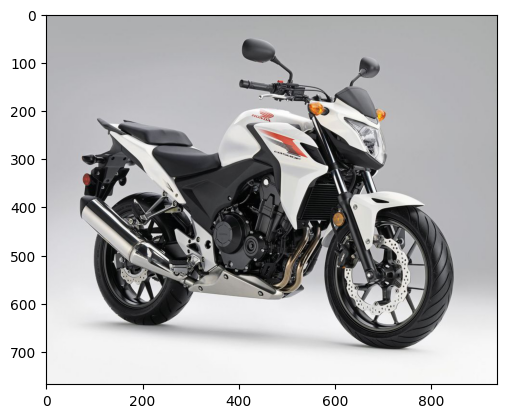

Car = 4.307375049684781%
Moto = 95.69262495031522%
The predicted image is : Moto
Is the image a Moto ?(y/n)
y


In [15]:
model=pickle.load(open('/content/drive/MyDrive/SVM/Car-Moto-Dataset/car_model.p','rb'))

url=input('Enter URL of Image: ')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))